<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_1/example_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def linear_regression(intercept, slope, features):
  return intercept + features * slope

In [4]:
def loss_function(intercept, slope, targets, features):
  predictions = linear_regression(intercept, slope, features)
  return tf.keras.losses.mse(targets, predictions)

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


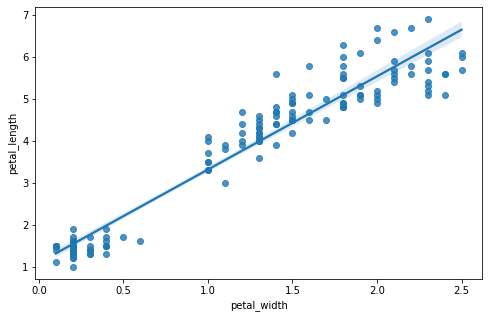

In [6]:
plt.figure(figsize=(8,5))
sns.regplot(data = data, x ="petal_width", y ="petal_length")
plt.show()


In [7]:
length = tf.cast(data.petal_length, tf.float32)
width = tf.cast(data.petal_width, tf.float32)

In [8]:
intercept = tf.Variable(0.1, tf.float32)
slope = tf.Variable(0.1, tf.float32)

Tính toán tối thiểu Loss Function

In [9]:
opt = tf.keras.optimizers.Adam()

In [13]:
for j in range(10000):
  opt.minimize(lambda: loss_function(intercept, slope, length, width),\
               var_list=[intercept, slope])
  if j % 1000 == 0:
    print(loss_function(intercept, slope, length, width))

tf.Tensor(0.22605252, shape=(), dtype=float32)
tf.Tensor(0.22605252, shape=(), dtype=float32)
tf.Tensor(0.22605248, shape=(), dtype=float32)
tf.Tensor(0.22605248, shape=(), dtype=float32)
tf.Tensor(0.22605251, shape=(), dtype=float32)
tf.Tensor(0.22605251, shape=(), dtype=float32)
tf.Tensor(0.22605251, shape=(), dtype=float32)
tf.Tensor(0.22605245, shape=(), dtype=float32)
tf.Tensor(0.22605248, shape=(), dtype=float32)
tf.Tensor(0.22605248, shape=(), dtype=float32)


In [14]:
# MSE
tf.print(loss_function(intercept, slope, length, width))

0.226052478


In [16]:
print(intercept.numpy(), slope.numpy())

1.0905695 2.225883


In [18]:
# Dự đoán width = 1.5=> height = ?
x_new = 1.5
y_new = linear_regression(intercept, slope, x_new)
y_new.numpy()

4.429394